# Model Training - Using Cleaned Forest Fire Data Set

Attribute Information:

    Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    RH : Relative Humidity in %: 21 to 90
    Ws :Wind speed in km/h: 6 to 29
    Rain: total day in mm: 0 to 16.8 FWI Components
    Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    Drought Code (DC) index from the FWI system: 7 to 220.4
    Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    Buildup Index (BUI) index from the FWI system: 1.1 to 68
    Fire Weather Index (FWI) Index: 0 to 31.1
    Classes: two classes, namely Fire and not Fire

In [1153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1154]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [1155]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [1156]:
##drop month,day and year

df.drop(['day','month','year'],axis=1,inplace=True)

df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [1157]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [1158]:
# Encoding of categories in Classes column

df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [1159]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Declare Independent And dependent features

In [1164]:

X=df.drop('FWI',axis=1)
Y=df['FWI']

In [1165]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [1168]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

## Train-Test Split

In [1169]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.25 , random_state = 42 )

In [1170]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((182, 11), (61, 11), (182,), (61,))

## Feature Selection based on correlaltion

In [1171]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


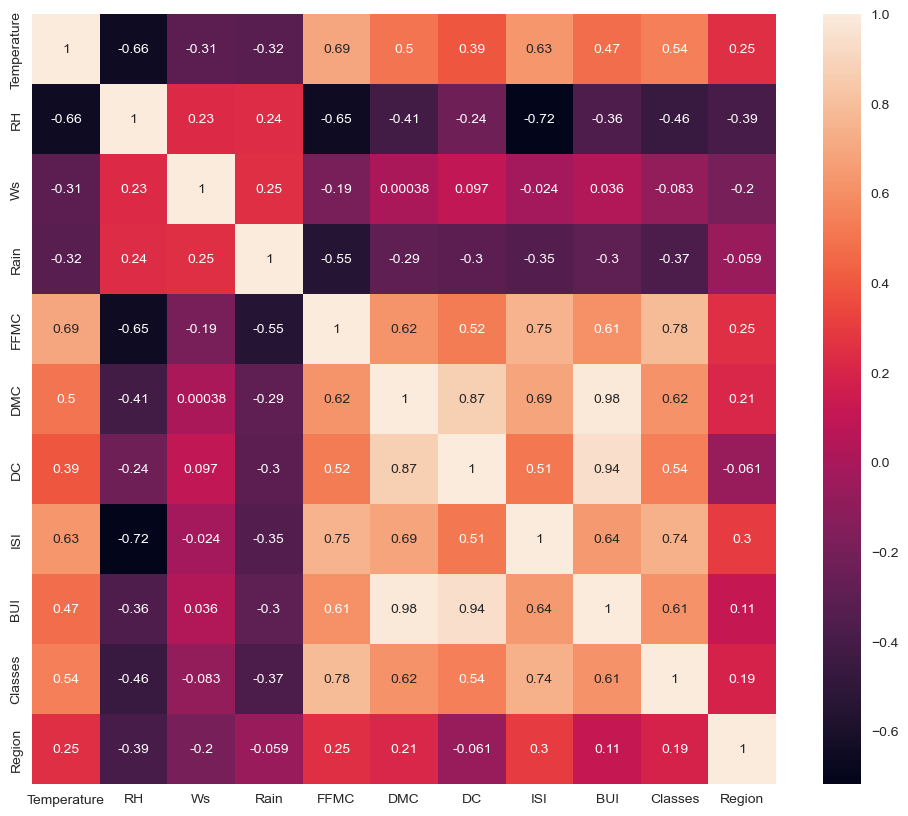

In [1174]:
## Check for multicollinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [1195]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [1175]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [1176]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname =  corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


# identifying highly correlated features in a dataset (often used before training a model to remove redundant features).

In [1196]:
corr_features = correlation(X_train , 0.85)

corr_features

{'BUI', 'DC'}

In [1197]:
# drop features when correlation is greater than 0.85

X_train.drop(corr_features, axis =1 , inplace= True)
X_test.drop(corr_features, axis =1 , inplace= True)

X_train.shape , X_test.shape

((182, 9), (61, 9))

# Feature Scaling and Standardization

In [1198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   #fit +transform

X_test_scaled = scaler.transform(X_test)         #only transform


In [1203]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box Plot to understand the effect of standard scaler

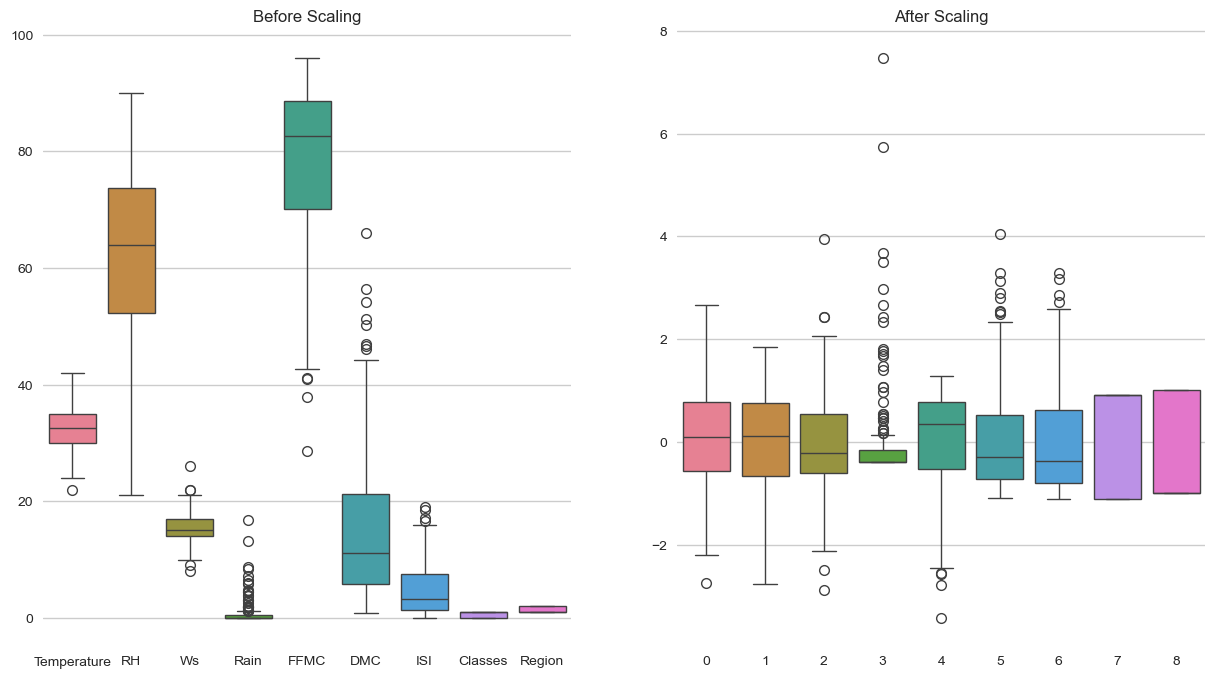

In [1207]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)    # 1 row, 2 columns, 1st box
sns.boxplot(data= X_train)
plt.title("Before Scaling")

plt.subplot(1,2,2)     # 1 row, 2 columns, 2nd box
sns.boxplot(data= X_train_scaled)
plt.title("After Scaling")

plt.show()

# lets create Linear Regression Model & Performance Matrices

In [1212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error      # absolute error would be better as many outliers
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled , Y_train)
Y_pred = linreg.predict(X_test_scaled)

print('coefficients are:',linreg.coef_)
print('Intercept is:',linreg.intercept_)
print('predicted Y values are:', Y_pred)

mae = mean_absolute_error(Y_test , Y_pred)
print('Mean absolute error:', mae)

score = r2_score(Y_test , Y_pred)
print('R2 score:', score)


coefficients are: [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]
Intercept is: 7.156043956043957
predicted Y values are: [ 8.22340505e+00  7.75252922e+00 -2.54117416e-01  4.35589319e+00
  6.69135945e+00  1.36202538e+00  2.03864111e+00  7.79328670e+00
  1.72547890e+00  3.33158516e+00  4.13723043e-01  9.75001593e+00
  9.33180880e+00  1.70522541e+01  1.85133518e+01  1.24250301e+00
  1.85818589e+00 -2.19341618e-02  7.18794479e+00  3.06137615e+00
  1.43702876e+00  2.31135272e-01  6.57677437e+00  3.31761969e-01
  2.10846121e+01  5.11915298e+00  5.93220317e+00  9.80969813e+00
 -6.46764212e-02  9.81330986e+00  6.64475980e+00 -4.53909646e-01
  1.04015941e+01  1.45820244e+01  1.47807316e+00  4.33773546e-01
  2.04109845e+00  6.08454570e+00 -4.65467631e-01 -3.05185642e-01
  6.68439528e+00  1.79727675e+00  8.59237254e+00 -2.66715046e-01
  1.54439592e+01  8.32647113e+00  8.25849719e+00  1.42038134e+00
  1.29740729e+01  1.21912915e+00  2.

In [1213]:
# Adjusted R2

1- (1 - score)*(len(Y_test) - 1)/ ( len(Y_test)- X_test.shape[1] -1 )

#98.2 % 

0.9820773393255237

# Lasso Regression Model

In [1234]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error      # absolute error would be better as many outliers
from sklearn.metrics import r2_score

lasso = Lasso()

lasso.fit(X_train_scaled , Y_train)
Y_pred = lasso.predict(X_test_scaled)

print('coefficients are:',lasso.coef_)
print('Intercept is:',lasso.intercept_)
print('predicted Y values are:', Y_pred)

mae = mean_absolute_error(Y_test , Y_pred)
print('Mean absolute error:', mae)

score = r2_score(Y_test , Y_pred)
print('R2 score:', score)

coefficients are: [ 0.         -0.          0.         -0.          0.          2.99025157
  4.00824747  0.         -0.        ]
Intercept is: 7.156043956043957
predicted Y values are: [ 7.84570511  7.4760351   1.06280248  5.57182566  7.15885302  2.98472993
  3.29585571  7.88757659  2.64885633  3.93029159  1.49954269  9.90939713
  9.38584995 15.7567602  16.31754696  2.94285845  2.56817739 -0.40623463
  7.0973165   4.05837568  2.78651163  0.83183302  6.46086185  0.80409291
 19.21068568  5.76645732  5.86530516  9.16901185 -0.64326039  9.83769504
  6.56628861  1.06684001  9.62691324 13.06176805  2.57722597  2.28322385
  2.59487225  6.44426082  0.37191286  0.3915779   6.32171041  2.93276462
  8.11248975 -0.54845009 14.49798226  7.96825553  8.55326749  2.03662688
 12.4409409   1.88633635 25.87619242  6.07660958 15.93875663 17.14160346
 12.52311598 14.3603987   2.35836911  9.12915914  4.68421388 13.65732474
  5.85117379]
Mean absolute error: 1.1331759949144082
R2 score: 0.9492020263112388


In [1235]:
# Alternatively, you can directly use:
print("R² (using model.score):", lasso.score(X_test_scaled, Y_test))

R² (using model.score): 0.9492020263112388


In [1236]:
# when alpha = 0.1

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error      # absolute error would be better as many outliers
from sklearn.metrics import r2_score

lasso = Lasso(alpha= 0.1)          # alpha = lambda

lasso.fit(X_train_scaled , Y_train)
Y_pred = lasso.predict(X_test_scaled)

print('coefficients are:',lasso.coef_)
print('Intercept is:',lasso.intercept_)
print('predicted Y values are:', Y_pred)

mae = mean_absolute_error(Y_test , Y_pred)
print('Mean absolute error:', mae)

score = r2_score(Y_test , Y_pred)
print('R2 score:', score)


coefficients are: [-0.         -0.          0.          0.         -0.15211777  3.55296636
  4.68889443  0.03052163 -0.25302375]
Intercept is: 7.156043956043957
predicted Y values are: [ 8.14205556  7.67495064 -0.16362882  5.01071215  6.85413948  2.01437362
  2.31864529  7.70638302  2.12433741  3.5792941   0.77534517 10.16772849
  9.42424662 16.93698282 18.11105869  1.90997079  1.66075849 -1.08935244
  7.26454371  3.21213184  2.19072436  0.11456361  6.47746046  0.07713142
 20.89375194  5.20695743  5.84133117  9.70778958 -1.31148716  9.94980633
  6.67314118 -0.18092003 10.24034736 14.31562939  1.94758895  1.1338632
  2.01522408  6.03805653 -0.79431124 -0.75841877  6.41104906  2.34772323
  8.45247214 -1.27107943 15.3979145   8.29320216  8.51604907  1.4704256
 13.02996788  1.26697299 28.8749157   5.57930465 17.07930698 19.10765599
 13.59981281 15.90931328  1.25099453  9.13540937  3.93849709 14.44355578
  5.30440459]
Mean absolute error: 0.7084773819658268
R2 score: 0.9783246631008717


In [1237]:
# Alternatively, you can directly use:
print("R² (using model.score):", lasso.score(X_test_scaled, Y_test))

R² (using model.score): 0.9783246631008717


In [1240]:
#performance at different alpha values

for a in [0.01, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled , Y_train)
    print(f"Alpha = {a}, R² (test) = {lasso.score(X_test_scaled, Y_test):.4f}")
    

Alpha = 0.01, R² (test) = 0.9845
Alpha = 0.1, R² (test) = 0.9783
Alpha = 1, R² (test) = 0.9492
Alpha = 10, R² (test) = -0.0052
Alpha = 100, R² (test) = -0.0052


# Ridge Regression Model

In [1232]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error      # absolute error would be better as many outliers
from sklearn.metrics import r2_score

ridge = Ridge()

ridge.fit(X_train_scaled , Y_train)
Y_pred = ridge.predict(X_test_scaled)

print('coefficients are:',lasso.coef_)
print('Intercept is:',lasso.intercept_)
print('predicted Y values are:', Y_pred)

mae = mean_absolute_error(Y_test , Y_pred)
print('Mean absolute error:', mae)

score = r2_score(Y_test , Y_pred)
print('R2 score:', score)

coefficients are: [-0.         -0.          0.          0.         -0.15211777  3.55296636
  4.68889443  0.03052163 -0.25302375]
Intercept is: 7.156043956043957
predicted Y values are: [ 8.23695957  7.77133489 -0.20576373  4.38641746  6.73014882  1.38083778
  2.09821574  7.89573609  1.68710448  3.39608166  0.45955107  9.77115691
  9.35289622 17.03184252 18.46891974  1.31920963  1.83197436 -0.12967473
  7.18616187  3.15029834  1.4415705   0.20532056  6.60901914  0.34619299
 20.97777968  5.22692975  5.97066219  9.82599838 -0.18171193  9.83698303
  6.65050786 -0.43256887 10.40995342 14.57517502  1.52182034  0.47799404
  2.09598786  6.18530003 -0.51720703 -0.27108924  6.74656177  1.8115675
  8.60302337 -0.34697492 15.41467762  8.34164636  8.27783782  1.41852757
 12.97837116  1.24905696 29.40913561  5.66093325 17.23898525 19.38721803
 13.82278407 16.19164908  0.70419803  9.05107798  3.6760472  14.63186999
  5.27050843]
Mean absolute error: 0.5642305340105711
R2 score: 0.9842993364555512


In [1233]:
# Alternatively, you can directly use:

print("R² (using model.score):", ridge.score(X_test_scaled, Y_test))

R² (using model.score): 0.9842993364555512


In [1241]:
#performance at different alpha values

for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled , Y_train)
    print(f"Alpha = {a}, R² (test) = {ridge.score(X_test_scaled, Y_test):.4f}")

Alpha = 0.01, R² (test) = 0.9848
Alpha = 0.1, R² (test) = 0.9847
Alpha = 1, R² (test) = 0.9843
Alpha = 10, R² (test) = 0.9771
Alpha = 100, R² (test) = 0.8893


# Elastic Net

In [1242]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error      # absolute error would be better as many outliers
from sklearn.metrics import r2_score

elastic = ElasticNet()   #default alpha = 1

elastic.fit(X_train_scaled , Y_train)
Y_pred = elastic.predict(X_test_scaled)

print('coefficients are:',elastic.coef_)
print('Intercept is:',elastic.intercept_)
print('predicted Y values are:', Y_pred)

mae = mean_absolute_error(Y_test , Y_pred)
print('Mean absolute error:', mae)

score = r2_score(Y_test , Y_pred)
print('R2 score:', score)

coefficients are: [ 0.21700498 -0.46785751  0.         -0.          0.37217213  2.36758116
  2.35779601  0.87026661  0.        ]
Intercept is: 7.156043956043956
predicted Y values are: [ 8.440192    8.48416748  1.58398174  5.74704744  7.99925012  3.84543773
  4.65423145  9.85746701  2.41164568  4.42033198  1.69311557  9.29479476
  9.94989153 14.80040551 14.99184886  3.85114187  2.99061658 -0.97985369
  7.64927581  6.40186267  2.76037744  0.786395    7.65023687  1.04550366
 17.05166573  8.10156058  7.10480686  9.72405017 -1.63030854  9.98040215
  6.77739365  1.80475174  9.66423333 12.61018368  3.22848878  2.95760651
  4.2159643   8.47055095 -0.0452998  -0.22390909  8.07425176  3.59582409
  9.01788865 -1.00255442 13.98138726  8.47227471  8.66221408  2.37166362
 12.20709739  2.13892487 22.42259827  8.36459938 14.18257366 15.41045041
 12.03375106 13.32632753  3.23749418  9.62446446  5.98090909 13.781952
  7.4239577 ]
Mean absolute error: 1.8822353634896
R2 score: 0.8753460589519703


In [1243]:
#performance at different alpha values

for a in [0.01, 0.1, 1, 10, 100]:
    elastic = ElasticNet(alpha=a)
    elastic.fit(X_train_scaled , Y_train)
    print(f"Alpha = {a}, R² (test) = {elastic.score(X_test_scaled, Y_test):.4f}")

Alpha = 0.01, R² (test) = 0.9842
Alpha = 0.1, R² (test) = 0.9746
Alpha = 1, R² (test) = 0.8753
Alpha = 10, R² (test) = 0.1302
Alpha = 100, R² (test) = -0.0052


# Create Pickle file

# Ridge regression is used for pickle file as it reduces chances of overfitting, Simpler Linear regression model may overfits. 

In [1244]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))